In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [2]:
plt.style.use('science')

In [3]:
file = uproot.open('../../AllSimData/nue_0-1Gev_100kev_gntp.0.gst.root:gst;2')
data = file.arrays(library = 'np')

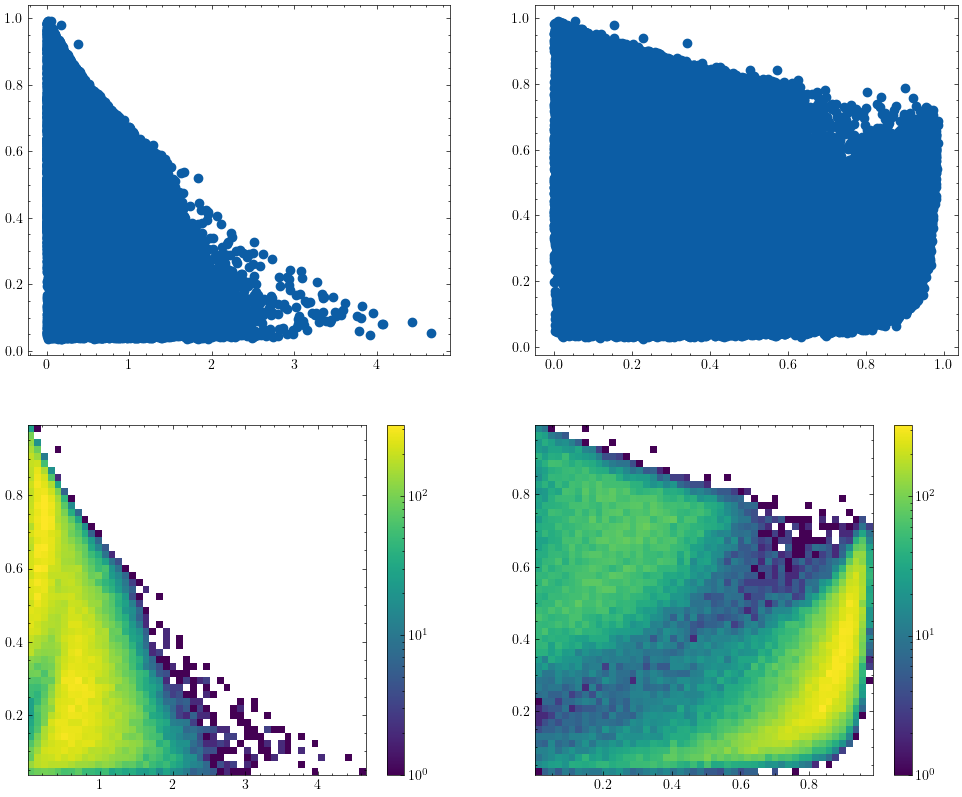

In [5]:
#Scatterplot of positions
mask1 = data['x'] > -1
mask2 = data['xs'] > -2000
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
ax[0,0].scatter(data['x'][mask1], data['y'][mask1])
ax[0,1].scatter(data['xs'][mask2], data['ys'][mask2])
p1 = ax[1,0].hist2d(data['x'][mask1],data['y'][mask1], bins = 50, norm = 'log', vmin = 1)
p2 = ax[1,1].hist2d(data['xs'][mask2],data['ys'][mask2], bins = 50, norm = 'log', vmin = 1)
fig.colorbar(p1[3], ax = ax[1,0])
fig.colorbar(p2[3], ax = ax[1,1])

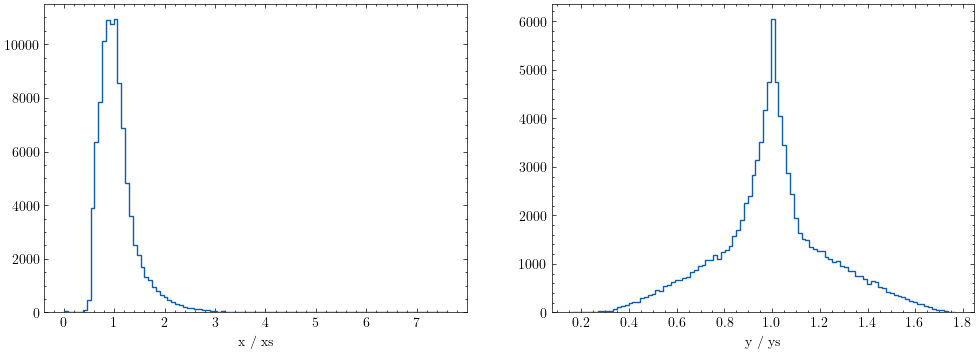

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
p1 = ax[0].hist(data['x'] / data['xs'], bins = 100, histtype = 'step')
p2 = ax[1].hist(data['y'][mask1] / data['ys'][mask1], bins = 100, histtype = 'step')
ax[0].set_xlabel('x / xs')
ax[1].set_xlabel('y / ys')
plt.savefig('s_relationship.pdf')

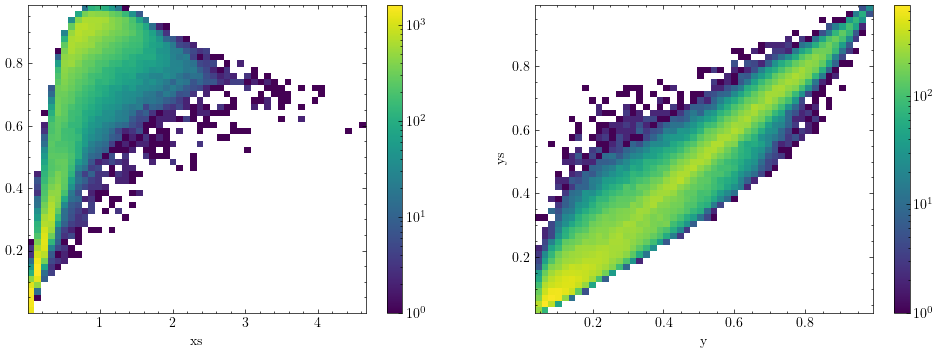

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
p1 = ax[0].hist2d(data['x'][mask1], data['xs'][mask1], bins = 50, norm = 'log')
p2 = ax[1].hist2d(data['y'][mask1], data['ys'][mask1], bins = 50, norm = 'log')
ax[0].set_xlabel('x')
ax[0].set_xlabel('xs')
ax[1].set_xlabel('y')
ax[1].set_ylabel('ys')

fig.colorbar(p1[3], ax = ax[0])
fig.colorbar(p2[3], ax = ax[1])
plt.savefig('2ds_correlation.pdf')

(array([   15.,    19.,    26.,    16.,    23.,    24.,    24.,    34.,
           47.,    37.,    44.,    73.,   110.,   101.,   108.,   137.,
          154.,   173.,   203.,   224.,   238.,   271.,  1859.,  3789.,
         3387.,  3029.,  2423.,  1634.,   447.,   682.,  1619.,  1462.,
         1321.,  1149.,   949.,   512.,   495.,   558.,  9933., 10824.,
         9543.,  8367.,  6875.,  6789.,  5749.,  3919.,  3379.,  2842.,
         2196.,  1207.]),
 array([0.9149754 , 0.91529029, 0.91560519, 0.91592009, 0.91623499,
        0.91654989, 0.91686478, 0.91717968, 0.91749458, 0.91780948,
        0.91812437, 0.91843927, 0.91875417, 0.91906907, 0.91938397,
        0.91969886, 0.92001376, 0.92032866, 0.92064356, 0.92095846,
        0.92127335, 0.92158825, 0.92190315, 0.92221805, 0.92253295,
        0.92284784, 0.92316274, 0.92347764, 0.92379254, 0.92410743,
        0.92442233, 0.92473723, 0.92505213, 0.92536703, 0.92568192,
        0.92599682, 0.92631172, 0.92662662, 0.92694152, 0.92725641

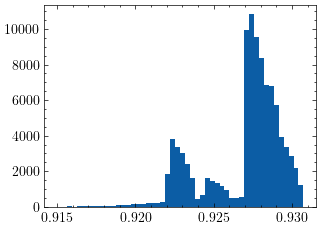

In [14]:
#These energies don't make sense
#Since I think these are protons/neutrons there shouldn't be a single energy value under 0.938
#Some indices also have E = 0
plt.hist(data['En'][data['En'] > 0], bins = 50)

In [15]:
#This is not the square mass?
data['En']**2 - (data['pxn']**2 + data['pyn']**2 + data['pzn']**2) 

array([0.83326598, 0.83770054, 0.85234208, ..., 0.85197846, 0.80350427,
       0.83187325])

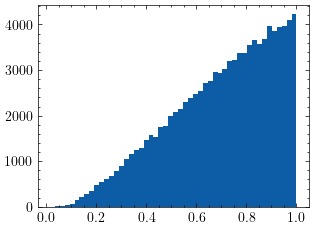

In [18]:
#Makes sense as neutrino energy values between 0 and 1 GeV
h = plt.hist(data['Ev'], bins = 50)

In [20]:
data['pdgf']

array([array([  11, 2212]), array([  11, 2212]),
       array([  11, 2212, 2212, 2112, 2112, 2112, 2112]), ...,
       array([  11, 2212, 2112]),
       array([  22,   11, 2212, 2212, 2212, 2212, 2212, 2112, 2112, 2112, 2112,
              2112])                                                           ,
       array([  12, 2212, 2212])], dtype=object)

In [21]:
data['pxf']

array([array([-0.00271428, -0.04451621]),
       array([-0.10088324, -0.00915718]),
       array([-0.12641992,  0.08275005, -0.00854202, -0.01655896,  0.09299621,
              -0.03955675,  0.02775534])                                      ,
       ..., array([ 0.16771961,  0.03339601, -0.        ]),
       array([-0.00320939, -0.07823075,  0.14571363, -0.04881053,  0.03723379,
              -0.0543595 ,  0.0791751 , -0.08531114,  0.06457637,  0.03282188,
              -0.0100484 ,  0.10351148])                                      ,
       array([-0.31159051, -0.07073297,  0.05786751])], dtype=object)

In [22]:
data['pdgi']

array([array([2212]), array([2212]), array([2212]), ..., array([2212]),
       array([2212,   22]), array([2212])], dtype=object)

In [23]:
data['pxi']

array([array([-0.04513965]), array([-0.0092905]), array([0.13884386]),
       ..., array([-0.17264947]), array([ 0.26450269, -0.00320939]),
       array([0.28995068])], dtype=object)